In [12]:
import argparse

In [13]:
config = {
    'batch_size': 16,
    'dataset': 'dsb2018_96',
    'img_ext': '.png',
    'mask_ext': '.png',
    'num_classes': 1,
    'num_workers': 4
}

In [14]:
import os
import sys
sys.path.append(".")
sys.path.append("..")
from src.config.config import cfg

In [15]:
from glob import glob
from sklearn.model_selection import train_test_split

In [16]:
input_dir = cfg.DSB2018_96_DIR
img_ids = glob(os.path.join(input_dir, 'images', '*' + config['img_ext']))
img_ids = [os.path.splitext(os.path.basename(p))[0] for p in img_ids]

train_img_ids, val_img_ids = train_test_split(img_ids, test_size=0.2, random_state=41)

In [25]:
for i in range(10):
    print(train_img_ids[i])

853a4c67900c411abd04467f7bc7813d3c58a5f565c8b0807e13c6e6dea21344
d2815f2f616d92be35c7e8dcfe592deec88516aef9ffc9b21257f52b7d6d0354
10ba6cbee4873b32d5626a118a339832ba2b15d8643f66dddcd7cb2ec80fbc28
ce88df7356d9d4a8d5944a93768f4c4b593de2d35616f7448c2b37b9fd60dd1f
a02ec007ae8feddb758078b1dfb8010c26886fd3c8babdc308ead8b4a63acbdb
ff3407842ada5bc18be79ae453e5bdaa1b68afc842fc22fa618ac6e6599d0bb3
d751ccb64fa767a65a966061218438bd1860695d96bbef11fdb2f0d3b8dedba8
edd36ed822e7ed760ff73e0524df22aa5bf5c565efcdc6c39603239c0896e7a8
514ccfc78cb55988a238d3ac9dc83460aa88382c95d56bcc0559962d9fe481ef
84eeec681987753029eb83ea5f3ff7e8b5697783cdb2035f2882d40c9a3f1029


In [21]:
import cv2
import numpy as np
import torch
import torch.utils.data

In [22]:
img_ids = train_img_ids
img_dir = os.path.join(input_dir, 'images')
mask_dir = os.path.join(input_dir, 'masks')
img_ext = config['img_ext']
mask_ext = config['mask_ext']
num_classes=config['num_classes']

In [23]:
def getitem(idx):
    img_id = img_ids[idx]

    # オリジナル画像を読み出し
    img = cv2.imread(os.path.join(img_dir, img_id + img_ext))

    mask = []
    for i in range(num_classes):
        mask.append(cv2.imread(os.path.join(mask_dir, str(i), img_id + mask_ext), cv2.IMREAD_GRAYSCALE)[..., None])

    mask = np.dstack(mask)
        
    img = img.astype('float32') / 255
    img = img.transpose(2, 0, 1)
    mask = mask.astype('float32') / 255
    mask = mask.transpose(2, 0, 1)

    return img, mask, {'img_id': img_id}

In [24]:
getItem = getitem(0)
print(getItem)

(array([[[0.8039216 , 0.8039216 , 0.7921569 , ..., 0.78431374,
         0.7921569 , 0.8       ],
        [0.8039216 , 0.8       , 0.79607844, ..., 0.77254903,
         0.78039217, 0.78431374],
        [0.8039216 , 0.8       , 0.79607844, ..., 0.7490196 ,
         0.7607843 , 0.7764706 ],
        ...,
        [0.78039217, 0.7764706 , 0.7764706 , ..., 0.7882353 ,
         0.79607844, 0.7921569 ],
        [0.7764706 , 0.77254903, 0.77254903, ..., 0.78431374,
         0.7921569 , 0.7921569 ],
        [0.7764706 , 0.7647059 , 0.7607843 , ..., 0.7882353 ,
         0.78431374, 0.78431374]],

       [[0.6392157 , 0.654902  , 0.6509804 , ..., 0.39215687,
         0.4627451 , 0.53333336],
        [0.6431373 , 0.6509804 , 0.6509804 , ..., 0.32941177,
         0.40392157, 0.4862745 ],
        [0.63529414, 0.6431373 , 0.6431373 , ..., 0.25490198,
         0.3137255 , 0.42745098],
        ...,
        [0.63529414, 0.627451  , 0.6039216 , ..., 0.6509804 ,
         0.6392157 , 0.63529414],
        [0.

# マスク画像の取得テスト

In [25]:
 idx = 1
 img_id = img_ids[idx]

path = os.path.join(mask_dir, str(idx), img_id + mask_ext)
print(path)

d:\DATA\R2_Miki\python\AI\Analysis\data\DataScienceBowl\dsb2018_96\masks\1\cfabf7379c5591d40aa4a20c86b4197c6a25ab55887a9fca4f06c2dfc0f0e973.png


In [26]:
mask=cv2.imread(path, cv2.IMREAD_GRAYSCALE)

print(mask)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
%matplotlib inline

from matplotlib import pyplot as plt

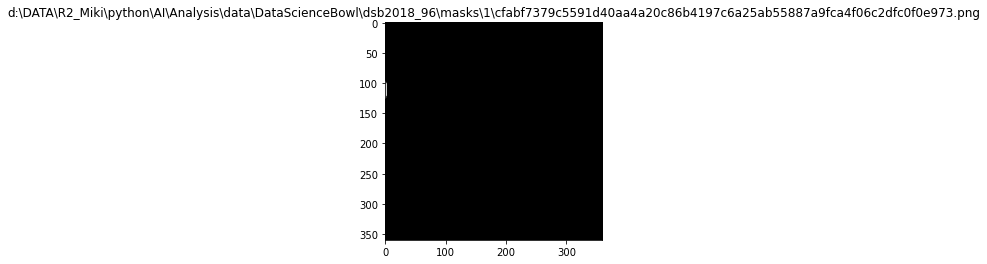

In [29]:
figure
plt.title(path)
plt.imshow(mask, cmap='gray')
plt.show()

# 複数のマスク画像の取得テスト

In [33]:
img_id = img_ids[idx]

img = cv2.imread(os.path.join(img_dir, img_id + img_ext))

mask = []
for i in range(8):
    mask.append(cv2.imread(os.path.join(mask_dir, str(i), img_id + mask_ext), cv2.IMREAD_GRAYSCALE)[..., None])

mask = np.dstack(mask)
        
img = img.astype('float32') / 255
img = img.transpose(2, 0, 1)
mask = mask.astype('float32') / 255
mask = mask.transpose(2, 0, 1)

Text(0.5, 1.0, 'img_id')

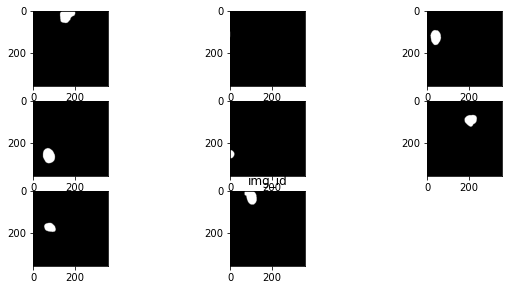

In [39]:
figure = plt.figure(1, figsize=(10, 8))
for i, d in enumerate(mask):
    plt.subplot(5, 3, i+1)
    plt.imshow(d, cmap='gray')